# MAS Final Homework Assignment
Daniel Engbert, Dec 2022

In [2]:
# helper function for use in code code below
import random
import numpy as np

def set_seed(seed=42):
  rng = random.Random()
  if seed is None:
    seed = random.randint(0, 9999)
  rng.seed(seed)
  np.random.seed(seed)

## 1. Monte Carlo Estimation of Shapely Value

First we compute the Shapely values for this problem for a small $n=4$.

TODO: do this by hand, then add the math here as latex equations.

In [23]:
set_seed()

coalitions = {'A': 1, 'B': 2, 'C': 3, 'D': 4}
players = list(coalitions.keys())

def get_perms(arr):
    if len(arr) == 0:
        return []
    all_perms = []
    for p in arr:
        other_elems = list(set(arr) - set([p]))
        other_elems.sort()
        sub_perms = get_perms(other_elems)
        if len(sub_perms) == 0:
            all_perms.append([p])
        else:
            all_perms = all_perms + [[p] + perm for perm in sub_perms]
    return all_perms

# list of permutations of coalitions of size len(players)
perms = get_perms(players)

print('permutations:')
display(perms)
print(f"there are {len(perms)} total permutations of {len(players)} players")


permutations:


[['A', 'B', 'C', 'D'],
 ['A', 'B', 'D', 'C'],
 ['A', 'C', 'B', 'D'],
 ['A', 'C', 'D', 'B'],
 ['A', 'D', 'B', 'C'],
 ['A', 'D', 'C', 'B'],
 ['B', 'A', 'C', 'D'],
 ['B', 'A', 'D', 'C'],
 ['B', 'C', 'A', 'D'],
 ['B', 'C', 'D', 'A'],
 ['B', 'D', 'A', 'C'],
 ['B', 'D', 'C', 'A'],
 ['C', 'A', 'B', 'D'],
 ['C', 'A', 'D', 'B'],
 ['C', 'B', 'A', 'D'],
 ['C', 'B', 'D', 'A'],
 ['C', 'D', 'A', 'B'],
 ['C', 'D', 'B', 'A'],
 ['D', 'A', 'B', 'C'],
 ['D', 'A', 'C', 'B'],
 ['D', 'B', 'A', 'C'],
 ['D', 'B', 'C', 'A'],
 ['D', 'C', 'A', 'B'],
 ['D', 'C', 'B', 'A']]

there are 24 total permutations of 4 players


"\n#for csize in range(len(players)):\n#    for \n\n\n#N = 3\nN = len(coalitions.keys())\n\n\nfor csize in range(2, N+1):\n    # build all coalitions of size csize\n    # iterate over all coalitions of length csize-1\n    for co in [k for k in coalitions.keys() if len(k.split(',')) == csize-1]:\n        elems = set(co.split(','))\n        for p in players:\n            if p in elems:\n                continue\n            new_co = elems()\n\n\n    #for n in range(N):\n    #    key = str(n)\n    #    coalitions.add(n),\n"

---
## 2. Monte Carlo Tree Search (MCTS)

3

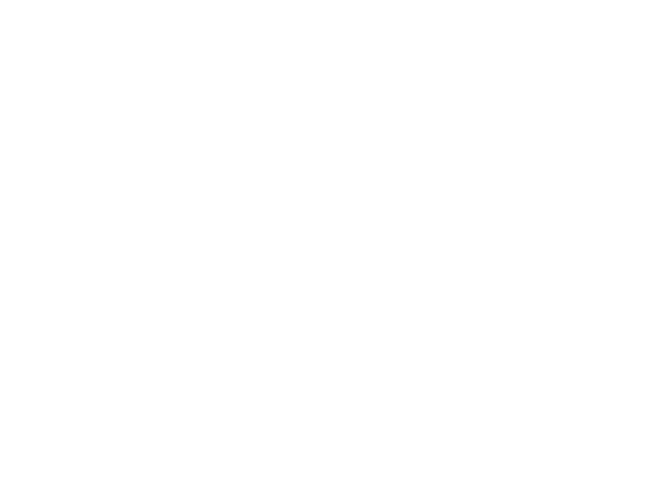

In [4]:
import networkx as nx
tree = nx.DiGraph()

nx.draw(tree, with_labels=True, node_size=2000)
set_seed()

def edit_distance(add1: str, add2: str) -> int:
    assert len(add1) == len(add2)
    diff = 0
    return sum([int(a1 != a2) for a1, a2 in zip(add1, add2)])

edit_distance("RRLL", "RLRR")

---
## RL: SARSA and Q-Learning

In [5]:
import numpy as np

EMPTY = 0
WALL = 1
SNAKES = 2
TREASURE = 3

def create_world():
  world = np.zeros((9,9), dtype=int)
  world[1, 2:7] = WALL
  world[1:5, 6] = WALL
  world[7, 1:5] = WALL
  world[6:5] = SNAKES
  world[-1, -1] = TREASURE
  return world

world = create_world()
display(world)


array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3]])